### Morphology (Second Image)

##### Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.morphology import square, disk, binary_closing, binary_opening, binary_erosion, thin

##### Reading Second Image

Second Image Size: (359, 431)


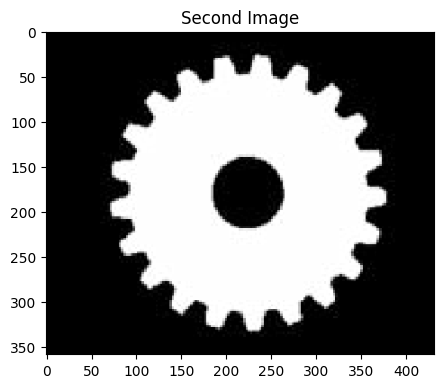

In [2]:
img = np.array( Image.open( "IMG/02.png").convert( "L"))

print( f"Second Image Size: { img.shape}")

plt.figure( figsize=( 5, 5))
plt.title( "Second Image")
plt.imshow( img, cmap="gray")

plt.show()

##### Second Image Histogram

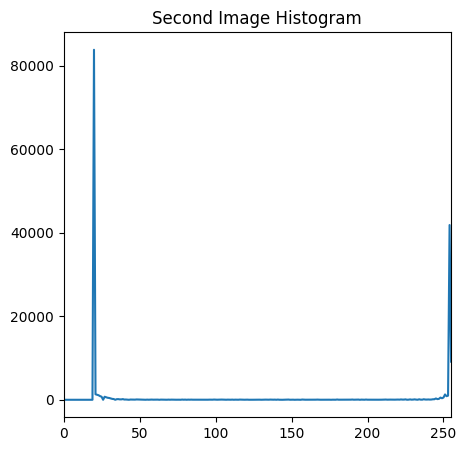

In [3]:
hist, bin = np.histogram( img.ravel(), 256, [ 0, 255])

plt.figure( figsize=( 5, 5))
plt.xlim( [ 0, 255])
plt.plot( hist)
plt.title( "Second Image Histogram")
plt.show()

##### Thresholding Second Image

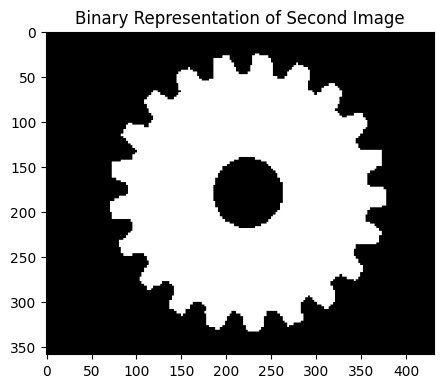

In [4]:
threshold = 70

threshold_img = np.copy( img)
threshold_img[ img > threshold] = 1
threshold_img[ img <= threshold] = 0

plt.figure( figsize=( 5, 5))
plt.imshow( threshold_img, cmap="gray")
plt.title( "Binary Representation of Second Image")
plt.show()

##### Apply closing to second image

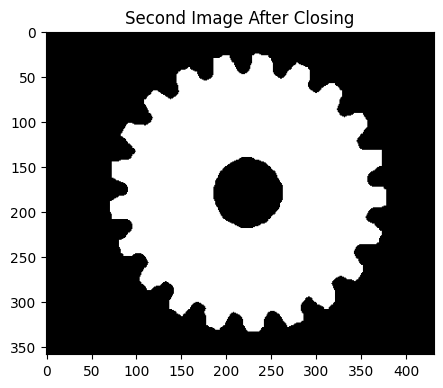

In [5]:
disk_se1 = disk( 4)

disk_closing_img1 = binary_closing( threshold_img, disk_se1)

plt.figure( figsize=( 5, 5))
plt.imshow( disk_closing_img1, cmap="gray")
plt.title( "Second Image After Closing")
plt.show()

##### Finding hole

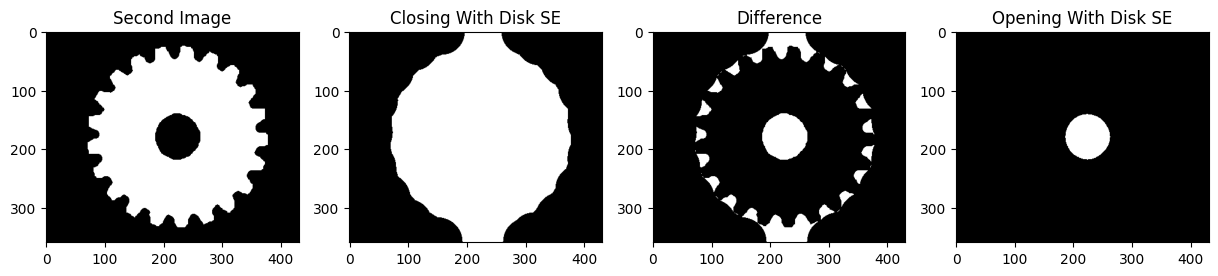

In [6]:
disk_se2 = disk( 40)

disk_closing_img2 = binary_closing( disk_closing_img1, disk_se2)

difference_img1 = disk_closing_img1 ^ disk_closing_img2

disk_se3 = disk( 30)
opened_difference_img1 = binary_opening( difference_img1, disk_se3)

fig = plt.figure( figsize=( 15, 15))

fig.add_subplot( 1, 4, 1)
plt.imshow( disk_closing_img1, cmap="gray")
plt.title( "Second Image")

fig.add_subplot( 1, 4, 2)
plt.imshow( disk_closing_img2, cmap="gray")
plt.title( "Closing With Disk SE")

fig.add_subplot( 1, 4, 3)
plt.imshow( difference_img1, cmap="gray")
plt.title( "Difference")

fig.add_subplot( 1, 4, 4)
plt.imshow( opened_difference_img1, cmap="gray")
plt.title( "Opening With Disk SE")

plt.show()

##### Finding center of hole

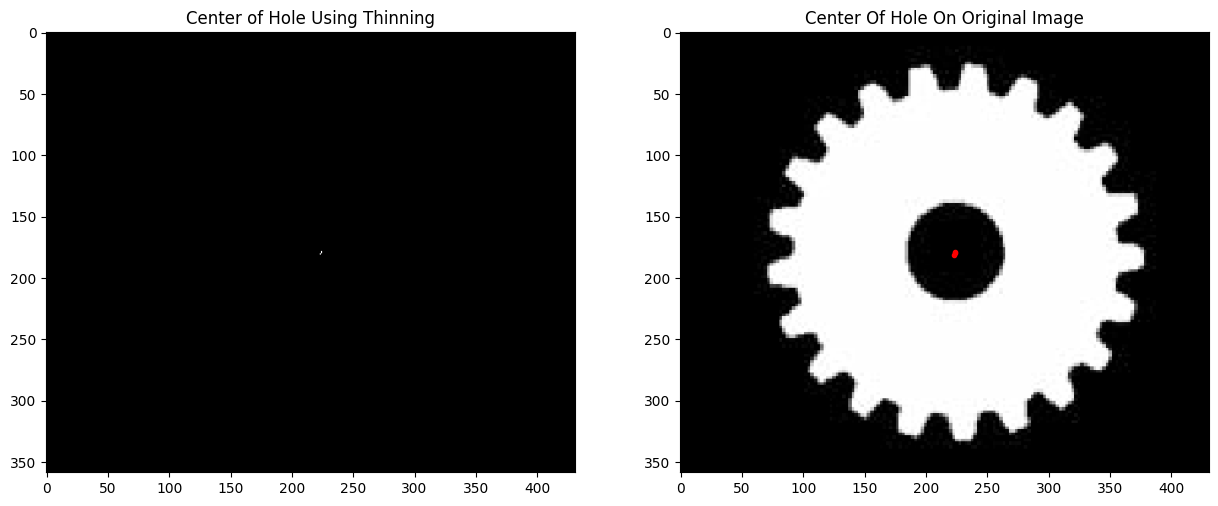

In [7]:
centers1 = thin( opened_difference_img1)

centers_idx1 = np.where( centers1 > 0)

fig = plt.figure( figsize=( 15, 15))

fig.add_subplot( 1, 2, 1)
plt.imshow( centers1, cmap="gray")
plt.title( "Center of Hole Using Thinning")

fig.add_subplot( 1, 2, 2)
plt.imshow( img, cmap="gray")
for i in range( len( centers_idx1[ 0])):
	plt.plot( centers_idx1[ 1][ i], centers_idx1[ 0][ i], marker=".", c="red")
plt.title( "Center Of Hole On Original Image")

plt.show()

##### Finding cogs

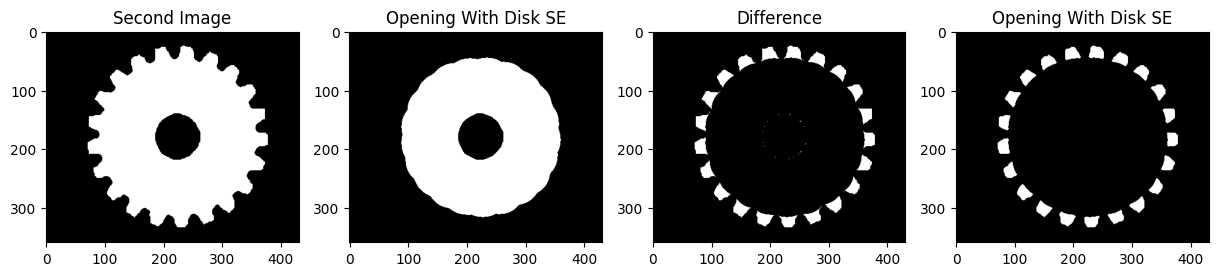

In [8]:
disk_se4 = disk( 40)

disk_opening_img1 = binary_opening( disk_closing_img1, disk_se4)

difference_img2 = disk_closing_img1 ^ disk_opening_img1

disk_se5 = disk( 2)
opened_difference_img2 = binary_opening( difference_img2, disk_se5)

fig = plt.figure( figsize=( 15, 15))

fig.add_subplot( 1, 4, 1)
plt.imshow( disk_closing_img1, cmap="gray")
plt.title( "Second Image")

fig.add_subplot( 1, 4, 2)
plt.imshow( disk_opening_img1, cmap="gray")
plt.title( "Opening With Disk SE")

fig.add_subplot( 1, 4, 3)
plt.imshow( difference_img2, cmap="gray")
plt.title( "Difference")

fig.add_subplot( 1, 4, 4)
plt.imshow( opened_difference_img2, cmap="gray")
plt.title( "Opening With Disk SE")

plt.show()

##### Finding center of cogs

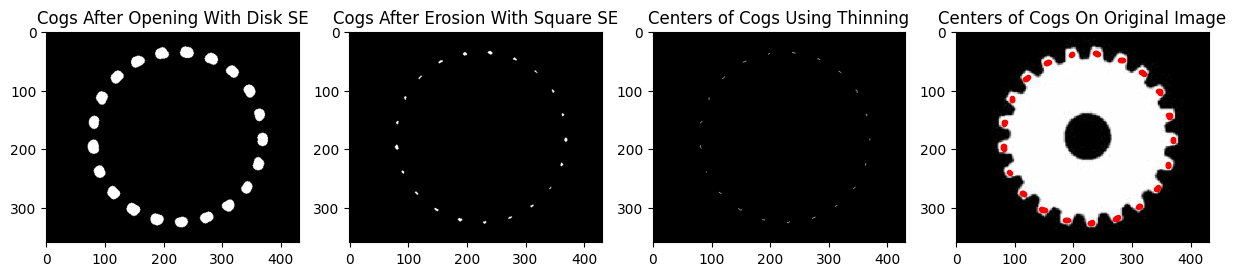

In [9]:
disk_se6 = disk( 7)

disk_opening_img2 = binary_opening( opened_difference_img2, disk_se6)

square_se = square( 12)

erode = binary_erosion( disk_opening_img2, square_se)

centers2 = thin( erode)

centers_idx2 = np.where( centers2 > 0)

fig = plt.figure( figsize=( 15, 15))

fig.add_subplot( 1, 4, 1)
plt.imshow( disk_opening_img2, cmap="gray")
plt.title( "Cogs After Opening With Disk SE")

fig.add_subplot( 1, 4, 2)
plt.imshow( erode, cmap="gray")
plt.title( "Cogs After Erosion With Square SE")

fig.add_subplot( 1, 4, 3)
plt.imshow( centers2, cmap="gray")
plt.title( "Centers of Cogs Using Thinning")

fig.add_subplot( 1, 4, 4)
plt.imshow( img, cmap="gray")
for i in range( len( centers_idx2[ 0])):
	plt.plot( centers_idx2[ 1][ i], centers_idx2[ 0][ i], marker=".", c="red")
plt.title( "Centers of Cogs On Original Image")

plt.show()